# Data Science Unit 1 Sprint Challenge 2

## Data Wrangling and Storytelling

Taming data from its raw form into informative insights and stories.

## Data Wrangling

In this Sprint Challenge you will first "wrangle" some data from [Gapminder](https://www.gapminder.org/about-gapminder/), a Swedish non-profit co-founded by Hans Rosling. "Gapminder produces free teaching resources making the world understandable based on reliable statistics."
- [Cell phones (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv)
- [Population (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Geo country codes](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/ddf--entities--geo--country.csv)

These two links have everything you need to successfully complete the first part of this sprint challenge.
- [Pandas documentation: Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html) (one question)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) (everything else)

### Part 0. Load data

You don't need to add or change anything here. Just run this cell and it loads the data for you, into three dataframes.

In [60]:
import pandas as pd

cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

geo_country_codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))

In [4]:
cell_phones.shape, population.shape, geo_country_codes.shape

((9215, 3), (59297, 3), (273, 33))

In [10]:
cell_phones.head()

,geo,time,cell_phones_total
0,abw,1960,0.0
1,abw,1965,0.0
2,abw,1970,0.0
3,abw,1975,0.0
4,abw,1976,0.0


In [11]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


### Part 1. Join data

First, join the `cell_phones` and `population` dataframes (with an inner join on `geo` and `time`).

The resulting dataframe's shape should be: (8590, 4)

In [41]:
df = pd.merge(cell_phones, population)
df.shape

(8590, 4)

In [13]:
df.head()


,geo_x,time,cell_phones_total,geo_y,population_total
0,abw,1960,0.0,afg,8996351
1,abw,1960,0.0,ago,5643182
2,abw,1960,0.0,alb,1636056
3,abw,1960,0.0,and,13411
4,abw,1960,0.0,are,92634


Then, select the `geo` and `country` columns from the `geo_country_codes` dataframe, and join with your population and cell phone data.

The resulting dataframe's shape should be: (8590, 5)

In [55]:
pd.options.display.max_columns = 500

geo_country_codes.head()

,geo,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,country,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [42]:
df = pd.merge(df, geo_country_codes[['geo', 'country']])

In [30]:
df.shape

(8590, 5)

In [31]:
df.head()

,geo,time,cell_phones_total,population_total,country
0,afg,1960,0.0,8996351,Afghanistan
1,afg,1965,0.0,9938414,Afghanistan
2,afg,1970,0.0,11126123,Afghanistan
3,afg,1975,0.0,12590286,Afghanistan
4,afg,1976,0.0,12840299,Afghanistan


***Optional bonus for Part 1: Take initiative to join more data.***

### Part 2. Make features

Calculate the number of cell phones per person, and add this column onto your dataframe.

(You've calculated correctly if you get 1.220 cell phones per person in the United States in 2017.)

In [33]:
df.dtypes

geo                   object
time                   int64
cell_phones_total    float64
population_total       int64
country               object
dtype: object

In [46]:
df['cells_per_person'] = df['cell_phones_total'] / df['population_total']

In [47]:
df.head()

,geo,time,cell_phones_total,population_total,country,cells_per_person
0,afg,1960,0.0,8996351,Afghanistan,0.0
1,afg,1965,0.0,9938414,Afghanistan,0.0
2,afg,1970,0.0,11126123,Afghanistan,0.0
3,afg,1975,0.0,12590286,Afghanistan,0.0
4,afg,1976,0.0,12840299,Afghanistan,0.0


In [49]:
df_usa = df[df['geo'] == 'usa']
df_usa

,geo,time,cell_phones_total,population_total,country,cells_per_person
8092,usa,1960,0.0,186808228,United States,0.000000
8093,usa,1965,0.0,199815540,United States,0.000000
8094,usa,1970,0.0,209588150,United States,0.000000
8095,usa,1975,0.0,219205296,United States,0.000000
8096,usa,1976,0.0,221239215,United States,0.000000
8097,usa,1977,0.0,223324042,United States,0.000000
8098,usa,1978,0.0,225449657,United States,0.000000
8099,usa,1979,0.0,227599878,United States,0.000000
8100,usa,1980,0.0,229763052,United States,0.000000
8101,usa,1984,91600.0,238573861,United States,0.000384


Modify the `geo` column to make the geo codes uppercase instead of lowercase.

In [53]:
df['geo'] = df['geo'].str.upper()

In [54]:
df.head()

,geo,time,cell_phones_total,population_total,country,cells_per_person
0,AFG,1960,0.0,8996351,Afghanistan,0.0
1,AFG,1965,0.0,9938414,Afghanistan,0.0
2,AFG,1970,0.0,11126123,Afghanistan,0.0
3,AFG,1975,0.0,12590286,Afghanistan,0.0
4,AFG,1976,0.0,12840299,Afghanistan,0.0


In [61]:
geo_country_codes['geo'] = geo_country_codes['geo'].str.upper()

In [62]:
geo_country_codes.head()

,geo,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,country,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,ABKH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,ABW,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,AFG,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,AGO,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,AIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [65]:
# df = pd.merge(df, geo_country_codes[['world_4region', 'landlocked', 'main_religion_2008']],
#              left_on='geo')

***Optional bonus for Part 2: Take initiative to make more features.***

### Part 3. Process data

Use the describe function, to describe your dataframe's numeric columns, and then its non-numeric columns.

(You'll see the time period ranges from 1960 to 2017, and there are 195 unique countries represented.)

In [66]:
df.head()

,geo,time,cell_phones_total,population_total,country,cells_per_person
0,AFG,1960,0.0,8996351,Afghanistan,0.0
1,AFG,1965,0.0,9938414,Afghanistan,0.0
2,AFG,1970,0.0,11126123,Afghanistan,0.0
3,AFG,1975,0.0,12590286,Afghanistan,0.0
4,AFG,1976,0.0,12840299,Afghanistan,0.0


In [68]:
import numpy as np

df.describe(exclude=np.number)

,geo,country
count,8590,8590
unique,195,195
top,NAM,Norway
freq,46,46


In [69]:
df.describe(include=np.number)

,time,cell_phones_total,population_total,cells_per_person
count,8590.000000,8.590000e+03,8.590000e+03,8590.000000
mean,1994.193481,9.004950e+06,2.983823e+07,0.279639
std,14.257975,5.573408e+07,1.161284e+08,0.454247
min,1960.000000,0.000000e+00,4.433000e+03,0.000000
25%,1983.000000,0.000000e+00,1.456148e+06,0.000000
50%,1995.000000,6.200000e+03,5.725062e+06,0.001564
75%,2006.000000,1.697652e+06,1.810581e+07,0.461149
max,2017.000000,1.474097e+09,1.409517e+09,2.490243


In 2017, what were the top 5 countries with the most cell phones total?

Your list of countries should have these totals:

| country | cell phones total |
|:-------:|:-----------------:|
|    ?    |     1,474,097,000 |
|    ?    |     1,168,902,277 |
|    ?    |       458,923,202 |
|    ?    |       395,881,000 |
|    ?    |       236,488,548 |



In [70]:
# This optional code formats float numbers with comma separators
pd.options.display.float_format = '{:,}'.format

In [71]:
df_2017 = df[df['time'] == 2017]

In [73]:
df_2017[df_2017['cell_phones_total'] > 235000000].sort_values(by='cell_phones_total',
                                                              ascending=False)

,geo,time,cell_phones_total,population_total,country,cells_per_person
1496,CHN,2017,"1,474,097,000.0",1409517397,China,1.0458168186766978
3595,IND,2017,"1,168,902,277.0",1339180127,India,0.8728491809526382
3549,IDN,2017,"458,923,202.0",263991379,Indonesia,1.738402230172827
8134,USA,2017,"395,881,000.0",324459463,United States,1.2201246847283354
1084,BRA,2017,"236,488,548.0",209288278,Brazil,1.1299655683535224


2017 was the first year that China had more cell phones than people.

What was the first year that the USA had more cell phones than people?

In [74]:
df_usa[df_usa['cell_phones_total'] > df_usa['population_total']]

#2014 was the first year the USA had more cell phones than people

,geo,time,cell_phones_total,population_total,country,cells_per_person
8131,usa,2014,"355,500,000.0",317718779,United States,1.118914031833164
8132,usa,2015,"382,307,000.0",319929162,United States,1.1949739048796058
8133,usa,2016,"395,881,000.0",322179605,United States,1.228758722948959
8134,usa,2017,"395,881,000.0",324459463,United States,1.2201246847283354


***Optional bonus for Part 3: Take initiative to do more exploratory data analysis.***

### (OPTIONAL) Part 4. Reshape data

*This part is not needed to pass the sprint challenge, only to get a 3! Only work on this after completing the other sections.*

Create a pivot table:
- Columns: Years 2007—2017
- Rows: China, India, United States, Indonesia, Brazil (order doesn't matter)
- Values: Cell Phones Total

The table's shape should be: (5, 11)

In [92]:
countries = df[df['country'].isin(['China', 'India', 'United States',
                                  'Indonesia', 'Brazil'])]
countries

,geo,time,cell_phones_total,population_total,country,cells_per_person
1039,BRA,1960,0.0,72207554,Brazil,0.0
1040,BRA,1965,0.0,83498020,Brazil,0.0
1041,BRA,1970,0.0,95326793,Brazil,0.0
1042,BRA,1975,0.0,107612100,Brazil,0.0
1043,BRA,1976,0.0,110213082,Brazil,0.0
1044,BRA,1977,0.0,112867867,Brazil,0.0
1045,BRA,1978,0.0,115577669,Brazil,0.0
1046,BRA,1979,0.0,118342626,Brazil,0.0
1047,BRA,1980,0.0,121159761,Brazil,0.0
1048,BRA,1981,0.0,124030908,Brazil,0.0


In [94]:
years = df[df['time'].isin(['2007', '2008', '2009', '2010', '2011', 
                         '2012', '2013', '2014', '2015', '2016', '2017'])]

In [95]:
df_pivot = pd.merge(countries, years)
df_pivot

,geo,time,cell_phones_total,population_total,country,cells_per_person
0,BRA,2007,"120,980,103.0",191026637,Brazil,0.6333153580042348
1,BRA,2008,"150,641,403.0",192979029,Brazil,0.7806102237150339
2,BRA,2009,"169,385,584.0",194895996,Brazil,0.869107562373934
3,BRA,2010,"196,929,978.0",196796269,Brazil,1.000679428531239
4,BRA,2011,"234,357,507.0",198686688,Brazil,1.1795330092774006
5,BRA,2012,"248,323,703.0",200560983,Brazil,1.2381456217733038
6,BRA,2013,"271,099,799.0",202408632,Brazil,1.3393687626918995
7,BRA,2014,"280,728,796.0",204213133,Brazil,1.3746853195773652
8,BRA,2015,"257,814,274.0",205962108,Brazil,1.2517558521007175
9,BRA,2016,"244,067,356.0",207652865,Brazil,1.1753623336716303


In [101]:
pivot = pd.pivot_table(df_pivot, index=['country'], columns=['time'], values=['cell_phones_total'])
pivot

cell_phones_total                                            \
time                       2007          2008          2009          2010   
country                                                                     
Brazil            120,980,103.0 150,641,403.0 169,385,584.0 196,929,978.0   
China             547,306,000.0 641,245,000.0 747,214,000.0 859,003,000.0   
India             233,620,000.0 346,890,000.0 525,090,000.0 752,190,000.0   
Indonesia          93,386,881.0 140,578,243.0 163,676,961.0 211,290,235.0   
United States     249,300,000.0 261,300,000.0 274,283,000.0 285,118,000.0   

                                                                             \
time                   2011            2012            2013            2014   
country                                                                       
Brazil        234,357,507.0   248,323,703.0   271,099,799.0   280,728,796.0   
China         986,253,000.0 1,112,155,000.0 1,229,113,000.0 1,286,093,000.0   
India         893,862,478.0   864,720,917.0   886,304,245.0   944,008,677.0   
Indonesia     249,805,619.0   281,963,665.0   313,226,914.0   325,582,819.0   
United States 297,404,000.0   304,838,000.0   310,698,000.0   355,500,000.0   

                                                               
time                     2015            2016            2017  
country                                                        
Brazil          257,814,274.0   244,067,356.0   236,488,548.0  
China         1,291,984,200.0 1,364,934,000.0 1,474,097,000.0  
India         1,001,056,000.0 1,127,809,000.0 1,168,902,277.0  
Indonesia       338,948,340.0   385,573,398.0   458,923,202.0  
United States   382,307,000.0   395,881,000.0   395,881,000.0

Sort these 5 countries, by biggest increase in cell phones from 2007 to 2017.

Which country had 935,282,277 more cell phones in 2017 versus 2007?

In [103]:
# India had 935,000,000 more cell phones in 2017 than 2007

df_pivot_2007 = df_pivot[df_pivot['time'] == 2007]
df_pivot_2007

,geo,time,cell_phones_total,population_total,country,cells_per_person
0,BRA,2007,"120,980,103.0",191026637,Brazil,0.6333153580042348
11,CHN,2007,"547,306,000.0",1336800506,China,0.409414865975522
22,IDN,2007,"93,386,881.0",232989141,Indonesia,0.40082074468869777
33,IND,2007,"233,620,000.0",1179681239,India,0.19803654773558707
44,USA,2007,"249,300,000.0",300595175,United States,0.8293546295279024


In [104]:
df_pivot_2017 = df_pivot[df_pivot['time'] == 2017]

In [107]:
df_pivot_2017['cell_change_07_17'] = df_pivot_2017['cell_phones_total'] - df_pivot_2007['cell_phones_total']

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [108]:
df_pivot_2017.head()

,geo,time,cell_phones_total,population_total,country,cells_per_person,cell_change_07_17
10,BRA,2017,"236,488,548.0",209288278,Brazil,1.1299655683535224,nan
21,CHN,2017,"1,474,097,000.0",1409517397,China,1.0458168186766978,nan
32,IDN,2017,"458,923,202.0",263991379,Indonesia,1.738402230172827,nan
43,IND,2017,"1,168,902,277.0",1339180127,India,0.8728491809526382,nan
54,USA,2017,"395,881,000.0",324459463,United States,1.2201246847283354,nan


If you have the time and curiosity, what other questions can you ask and answer with this data?

## Data Storytelling

In this part of the sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

### Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [109]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv'
df = pd.read_csv(url).rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'})

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df['Occupation'] = df['Group'].apply(get_occupation)

### Part 1 — What's the breakdown of guests’ occupations per year?

For example, in 1999, what percentage of guests were actors, comedians, or musicians? What percentage were in the media? What percentage were in politics? What percentage were from another occupation?

Then, what about in 2000? In 2001? And so on, up through 2015.

So, **for each year of _The Daily Show_, calculate the percentage of guests from each occupation:**
- Acting, Comedy & Music
- Government and Politics
- Media
- Other

#### Hints:
You can make a crosstab. (See pandas documentation for examples, explanation, and parameters.)

You'll know you've calculated correctly when the percentage of "Acting, Comedy & Music" guests is 90.36% in 1999, and 45% in 2015.

**Optional Bonus Challenge:** Do additional insightful data exploration.

In [110]:
df.head()

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
0,1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music"
2,1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy & Music"
3,1999,film actress,1/14/99,Acting,Gillian Anderson,"Acting, Comedy & Music"
4,1999,actor,1/18/99,Acting,David Alan Grier,"Acting, Comedy & Music"


In [111]:
df.shape

(2693, 6)

In [118]:
crosstab = pd.crosstab(df['Year'], df['Occupation']).apply(lambda r: r/r.sum(), axis=1)

In [119]:
crosstab

Occupation,"Acting, Comedy & Music",Government and Politics,Media,Other
Year,,,,
1999,0.9036144578313253,0.012048192771084338,0.06626506024096386,0.018072289156626505
2000,0.7396449704142012,0.08284023668639054,0.1242603550295858,0.05325443786982249
2001,0.7261146496815286,0.03821656050955414,0.19745222929936307,0.03821656050955414
2002,0.6226415094339622,0.06918238993710692,0.2641509433962264,0.0440251572327044
2003,0.5602409638554217,0.10240963855421686,0.2469879518072289,0.09036144578313253
2004,0.38414634146341464,0.22560975609756098,0.27439024390243905,0.11585365853658537
2005,0.37037037037037035,0.16049382716049382,0.3333333333333333,0.13580246913580246
2006,0.36024844720496896,0.19254658385093168,0.2919254658385093,0.15527950310559005
2007,0.2553191489361702,0.1702127659574468,0.3333333333333333,0.24113475177304963


### Part 2 — Recreate this explanatory visualization:

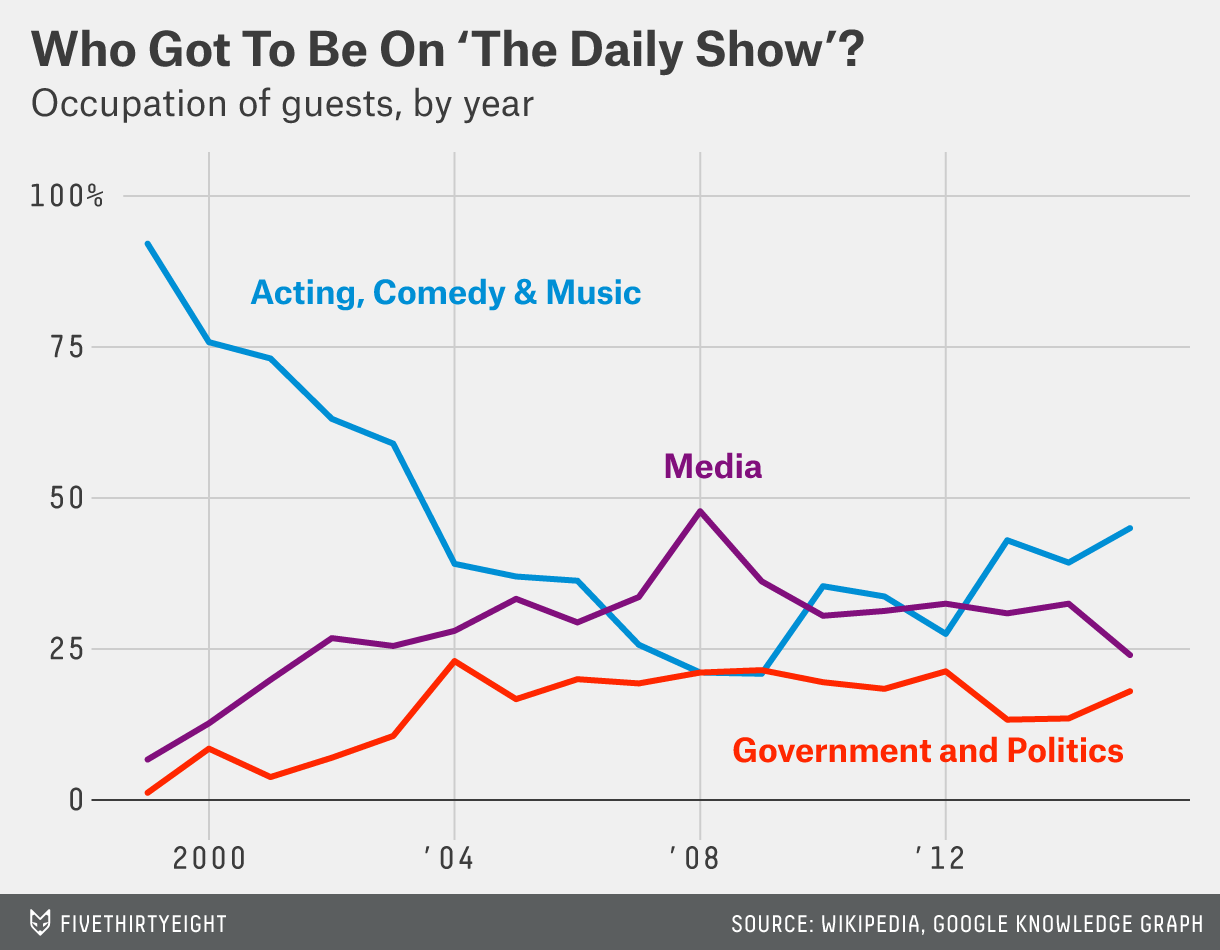

In [115]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(png, width=500)
display(example)

**Hints:**
- You can choose any Python visualization library you want. I've verified the plot can be reproduced with matplotlib, pandas plot, or seaborn. I assume other libraries like altair or plotly would work too.
- If you choose to use seaborn, you may want to upgrade the version to 0.9.0.

**Expectations:** Your plot should include:
- 3 lines visualizing "occupation of guests, by year." The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend or labels for the lines. (But you don't need each label positioned next to its line or colored like 538.)
- Title in the upper left: _"Who Got To Be On 'The Daily Show'?"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Occupation of guests, by year"_

**Optional Bonus Challenge:**
- Give your plot polished aesthetics, with improved resemblance to the 538 example.
- Any visual element not specifically mentioned in the expectations is an optional bonus.

In [182]:
crosstab = crosstab.drop(columns='Other')

<Figure size 432x288 with 0 Axes>

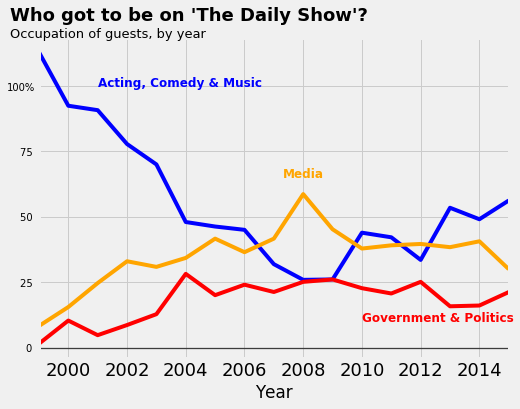

In [228]:
plt.style.use('fivethirtyeight')

colors = ['blue', 'red', 'orange']

fig = plt.figure()

DS_plot = crosstab.plot(figsize = (7.5, 5.5), color=colors)

DS_plot.tick_params(axis='both', which='major', labelsize=18)
DS_plot.set_yticklabels(labels = [-25, '0 ', '25 ', '50 ', '75 ', '100%'], fontsize=10)

DS_plot.axhline(y=0, color='black', linewidth=1.3, alpha=.7)

DS_plot.text(x=1998, y=1, s="Who got to be on 'The Daily Show'?", fontsize=18, fontweight='bold')
DS_plot.text(x=1998, y=.95, s='Occupation of guests, by year', fontsize=13)

DS_plot.text(x=2001, y=.8, s='Acting, Comedy & Music', fontsize=12, color='blue', fontweight='bold')
DS_plot.text(x=2007.3, y=.52, s='Media', fontsize=12, color='orange', fontweight='bold')
DS_plot.text(x=2010, y=.08, s='Government & Politics', fontsize=12, color='red', fontweight='bold')

DS_plot.get_legend().remove()

In [150]:
print('old ytick labels', DS_plot.get_yticks())

old ytick labels [-0.2  0.   0.2  0.4  0.6  0.8  1. ]


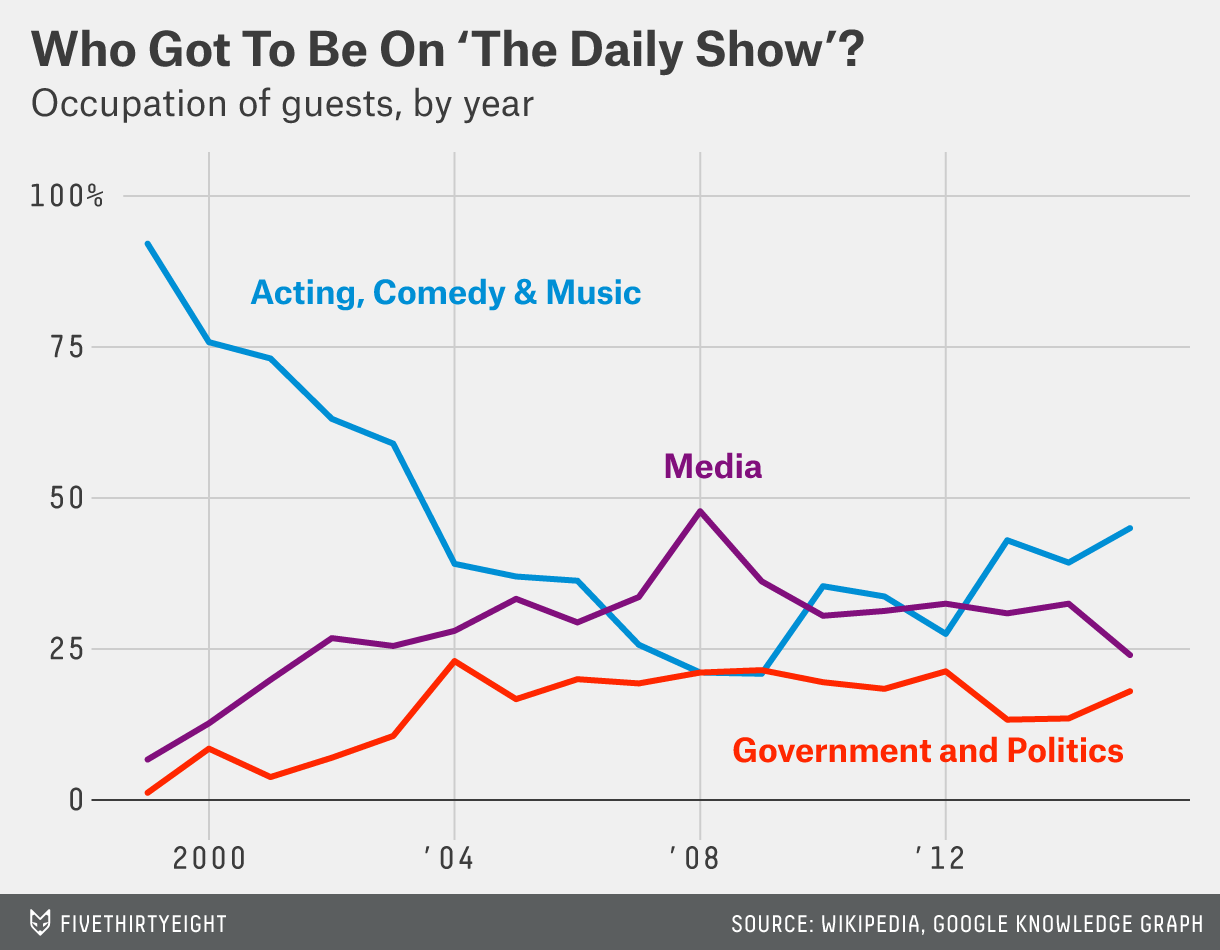

In [145]:
display(example)

### (OPTIONAL) Part 3 — Who were the top 10 guests on _The Daily Show_?

*This part is not needed to pass the sprint challenge, only to get a 3! Only work on this after completing the other sections.*

**Make a plot** that shows their names and number of appearances.

**Add a title** of your choice.

**Expectations:** It's ok to make a simple, quick plot: exploratory, instead of explanatory. 

**Optional Bonus Challenge:** You can change aesthetics and add more annotation. For example, in a relevant location, could you add the text "19" to show that Fareed Zakaria appeared 19 times on _The Daily Show_? (And so on, for each of the top 10 guests.)

In [241]:
df['Guest'].value_counts()

Fareed Zakaria              19
Denis Leary                 17
Brian Williams              16
Ricky Gervais               13
Paul Rudd                   13
Tom Brokaw                  12
Bill O'Reilly               10
Richard Lewis               10
Will Ferrell                10
Reza Aslan                  10
Sarah Vowell                 9
Louis C.K.                   8
Ben Affleck                  8
Adam Sandler                 8
Maggie Gyllenhaal            8
Mike Huckabee                8
Bob Dole                     7
Doris Kearns Goodwin         7
Steve Carell                 7
Colin Firth                  7
Samuel L. Jackson            7
Michael Moore                7
Bill Clinton                 7
Jeff Garlin                  7
Ted Koppel                   6
Jon Meacham                  6
Neil deGrasse Tyson          6
Paul Giamatti                6
Jake Gyllenhaal              6
Sen. John McCain             6
                            ..
Jake Gyllenhaal[8]           1
Andrí© B

In [245]:
top_10_data = pd.DataFrame()

people = ['Fareed Zakaria', 'Denis Leary', 'Brian Williams', 'Ricky Gervais',
          'Paul Rudd', 'Tom Brokaw', 'Bill OReilly', 'Richard Lewis',  
          'Will Ferrell', 'Reza Aslan']
appearances = [19, 17, 16, 13, 13, 12, 10, 10, 10, 10]

top_10_data['people'] = people
top_10_data['appearances'] = appearances

In [246]:
top_10_data

,people,appearances
0,Fareed Zakaria,19
1,Denis Leary,17
2,Brian Williams,16
3,Ricky Gervais,13
4,Paul Rudd,13
5,Tom Brokaw,12
6,Bill OReilly,10
7,Richard Lewis,10
8,Will Ferrell,10
9,Reza Aslan,10


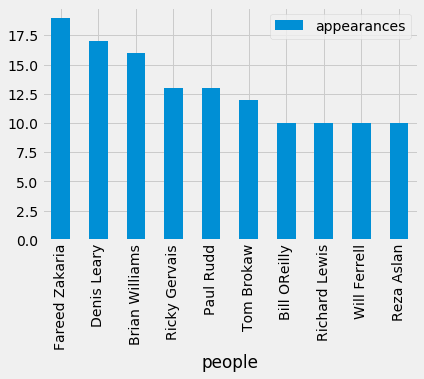

In [250]:
top_10_data.plot.bar(x='people')